# Time Series Analysis and Modeling

Time Series Forecasting: Another client wants to understand and predict fluctuations in a major financial index over time (similar to using S&P 500 data). They need to anticipate market conditions and plan investment strategies or budgeting decisions with greater confidence.

Forecast market or operational metrics reliably, enabling informed business and investment decisions.

# Connect to the Scenario

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Business Goal**

A global investment firm is aiming to strengthen its strategic planning, portfolio management, and risk mitigation capabilities by implementing a time series forecasting system for a major financial benchmark: the S&P 500 index. Rather than engaging in short-term speculation, the firm’s focus is on medium- to long-term investment horizons — including quarterly portfolio rebalancing, budget forecasting, and capital allocation.

To support these efforts, the firm seeks a data-driven forecasting solution that provides monthly projections of market behavior. Manual forecasting methods are inconsistent and cannot scale effectively across multiple asset classes. By adopting a structured modeling approach, the firm intends to gain more reliable visibility into market trends, enabling proactive and informed decision-making in dynamic economic environments.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Target Variable**

The dataset consists of daily S&P 500 historical data from January 2, 2013, to December 30, 2022, including Open, High, Low, Close, and Volume. We focus on the closing price (('Close', '^GSPC')) as our target variable, which reflects the index’s market value at the end of each trading day.

To better align with the firm's planning cycle and investment philosophy, we resample the daily data into a monthly time series, capturing the month-end closing price. This transformation helps smooth out short-term volatility and emphasizes structural market behavior over longer periods.

By modeling this monthly closing price time series, we aim to produce forecasts that support decisions such as capital deployment, risk exposure adjustment, and macro-level investment timing.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Strategic Advantages**

- Informed Planning: Reliable forecasts empower analysts to make data driven decisions around capital allocation, sector exposure, and liquidity planning.

- Risk Mitigation: Anticipating downturns or volatility helps the firm implement hedging strategies or portfolio adjustments ahead of time.

- Automation and Scale: A trained model can process and adapt to new data continuously, reducing reliance on manual forecasting and enabling scalable analysis across multiple indices or assets.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Time Series Analysis Strategy**

We begin by loading and exploring 10 years of historical S&P 500 data, focusing specifically on the daily closing price as our primary time series. This univariate data is structured chronologically and exhibits complex temporal dynamics, making it well-suited for time series forecasting models such as ARIMA.

To align with the firm’s medium- to long-term investment strategy, we resample the daily data into monthly frequency using the month-end closing prices. This transformation reduces short-term noise and highlights broader market trends that are more relevant for strategic decisions.

Next, we will explore the data's statistical properties — including trend and seasonality decomposition and stationarity testing — and apply any necessary transformations. Based on these insights, we will fit and evaluate forecasting models designed to capture the underlying structure of the data and produce accurate monthly projections.

The ultimate goal is to develop a model that generalizes well and delivers reliable forecasts to support high-level financial planning, such as asset allocation, risk management, and budgeting. This approach prioritizes forecasting accuracy at the monthly level, rather than optimizing for short-term trading or high-frequency prediction.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import yfinance as yf
import warnings

In [2]:
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Load and Visualize the data

[*********************100%***********************]  1 of 1 completed


S&P 500 Dataset:
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2013-01-02  1462.420044  1462.430054  1426.189941  1426.189941  4202600000
2013-01-03  1459.369995  1465.469971  1455.530029  1462.420044  3829730000
2013-01-04  1466.469971  1467.939941  1458.989990  1459.369995  3424290000
2013-01-07  1461.890015  1466.469971  1456.619995  1466.469971  3304970000
2013-01-08  1457.150024  1461.890015  1451.640015  1461.890015  3601600000

Dataset information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^GSPC)   2518 non-null   float64
 1   (High, ^GSPC)    2518 non-null   float64
 2   (Low, ^GSPC)     2518 non-null   float64
 3   (O

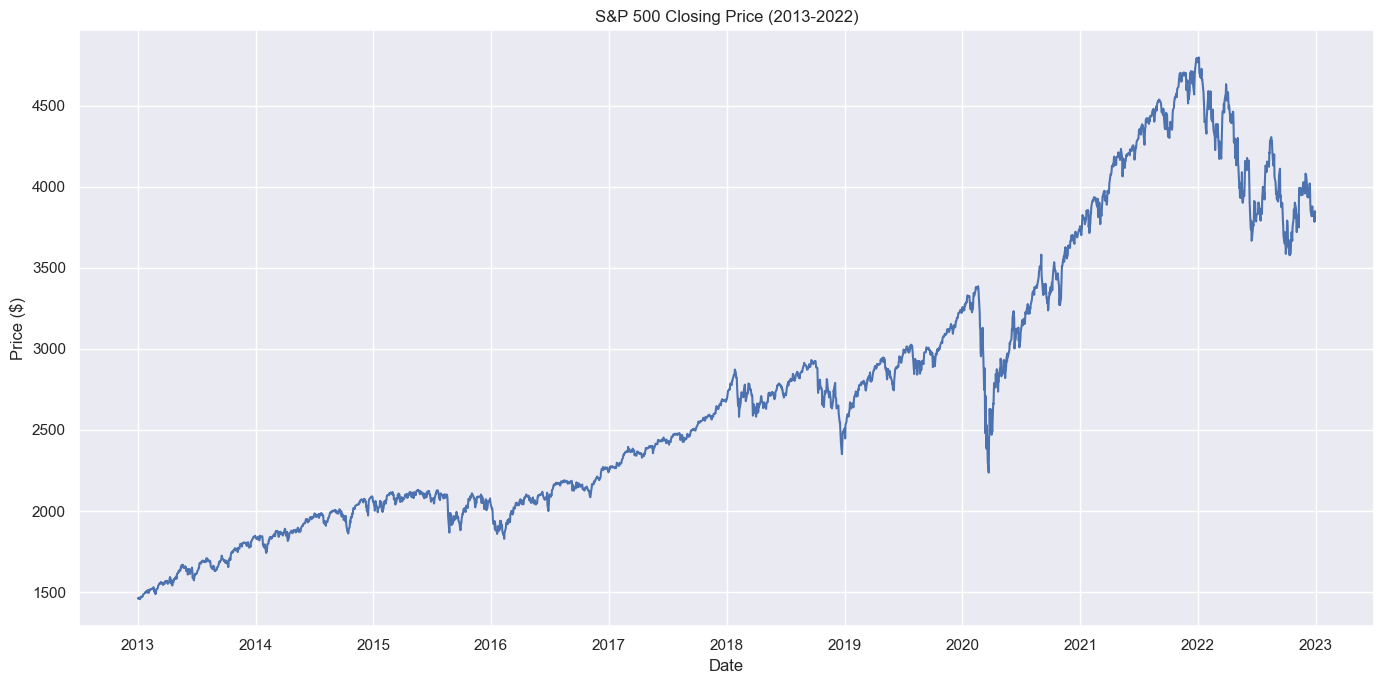


Selected time series shape: (2518, 1)


In [3]:
# Set plotting style
sns.set_theme()


# Download S&P 500 data for the last 10 years
sp500 = yf.download('^GSPC', start='2013-01-01', end='2022-12-31')


# Display the first few rows of the dataset
print("S&P 500 Dataset:")
print(sp500.head())


# Display basic information about the dataset
print("\nDataset information:")
print(sp500.info())


# Calculate basic summary statistics
print("\nSummary Statistics:")
print(sp500['Close'].describe())


# Check for missing values
print("\nMissing values in each column:")
print(sp500.isnull().sum())


# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(sp500.index, sp500['Close'])
plt.title('S&P 500 Closing Price (2013-2022)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Select the closing price as our primary time series for analysis
ts_data = sp500['Close']
print("\nSelected time series shape:", ts_data.shape)

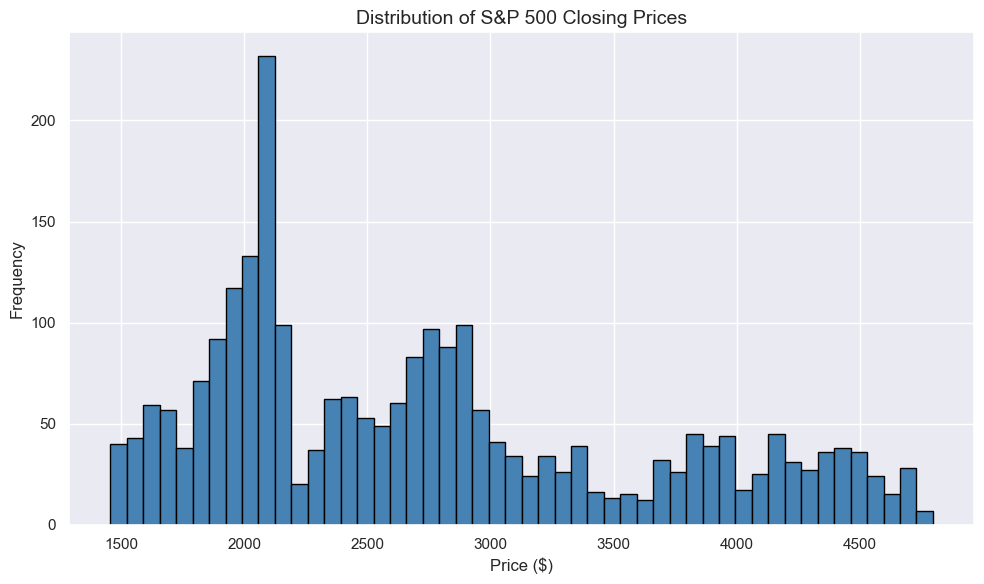

In [4]:
# Histogram of closing prices
plt.figure(figsize=(10, 6))
plt.hist(sp500['Close'], bins=50, color='steelblue', edgecolor='black')
plt.title("Distribution of S&P 500 Closing Prices", fontsize=14)
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

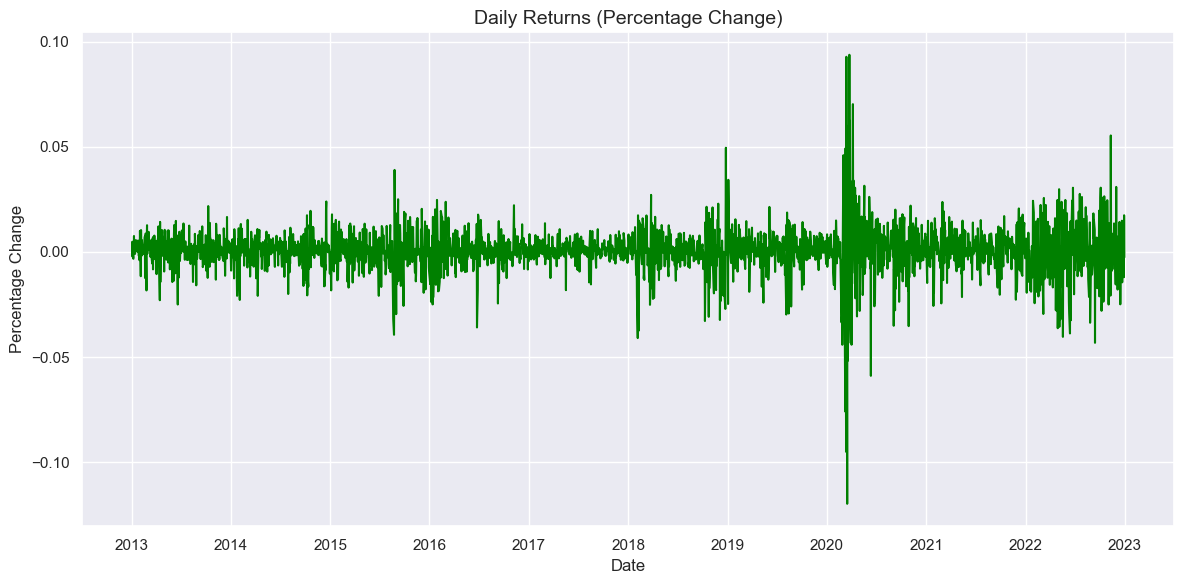

In [5]:
# Daily returns (percentage change)

# Calculate daily percentage change
daily_returns = sp500['Close'].pct_change().dropna()

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(daily_returns, color='green')
plt.title("Daily Returns (Percentage Change)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Percentage Change")
plt.grid(True)
plt.tight_layout()
plt.show()

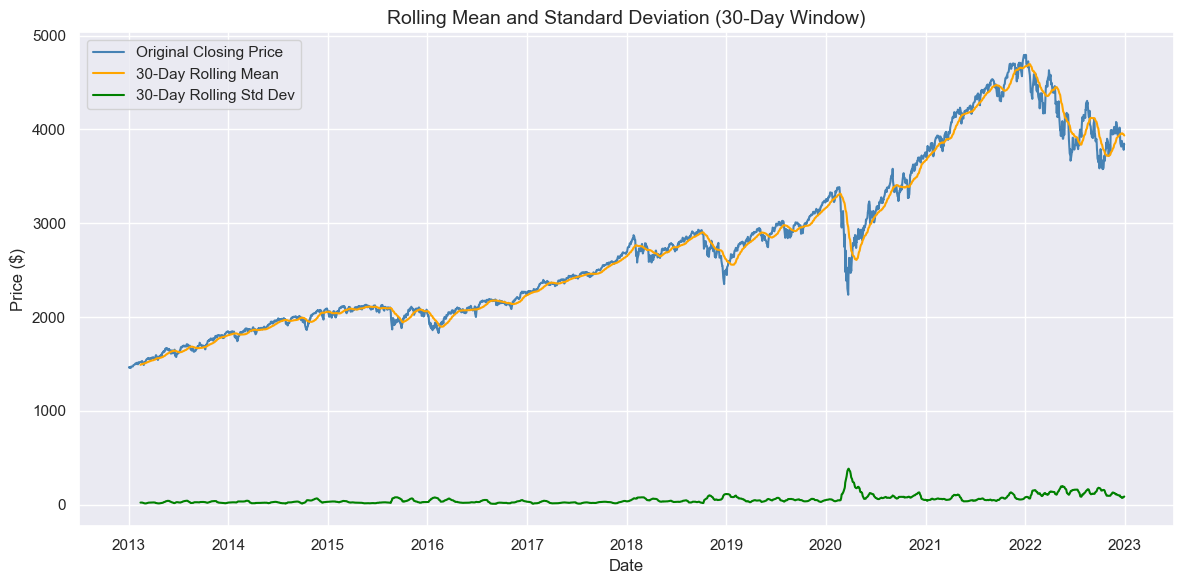

In [6]:
# Calculate rolling statistics
window = 30
rolling_mean = ts_data.rolling(window=window).mean()
rolling_std = ts_data.rolling(window=window).std()

# Plot original series with rolling mean and std dev
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Original Closing Price', color='steelblue')
plt.plot(rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.plot(rolling_std, label='30-Day Rolling Std Dev', color='green')
plt.title('Rolling Mean and Standard Deviation (30-Day Window)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Make a copy for monthly operations
sp500_M = sp500.copy()

# Drop the multi-index level from columns in the copy
sp500_M.columns = sp500_M.columns.droplevel(1)

# Resample to monthly frequency using average Close price
monthly_data = sp500_M[['Close']].resample('M').mean()

# Rename the columns and indexes
monthly_data.index.name = None
monthly_data.columns.name = None
monthly_data.index.name = 'Date'
monthly_data.columns = ['Price']

monthly_data.head()

,Price
Date,
2013-01-31,1480.395240
2013-02-28,1512.311581
2013-03-31,1550.828986
2013-04-30,1570.702265
2013-05-31,1639.842723


In [8]:
print(monthly_data.columns)

Index(['Price'], dtype='object')


In [9]:
monthly_data.index.name

'Date'

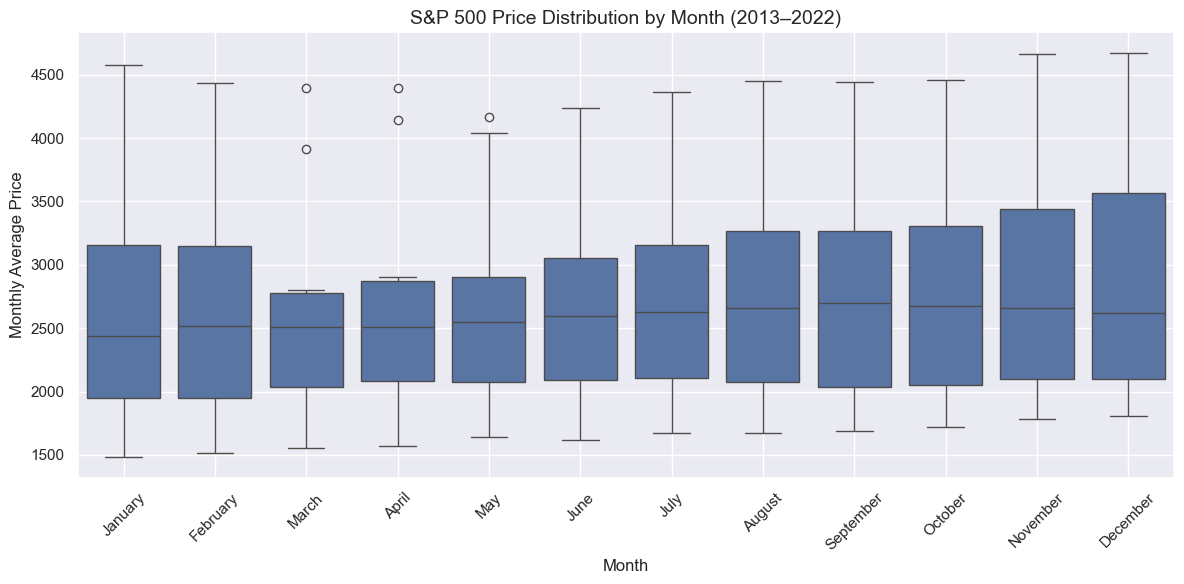

In [10]:
# Create boxplot monthly

boxplot_data = monthly_data.copy()
boxplot_data['Month'] = boxplot_data.index.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Price', data=boxplot_data, order=month_order)
plt.title('S&P 500 Price Distribution by Month (2013–2022)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Monthly Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

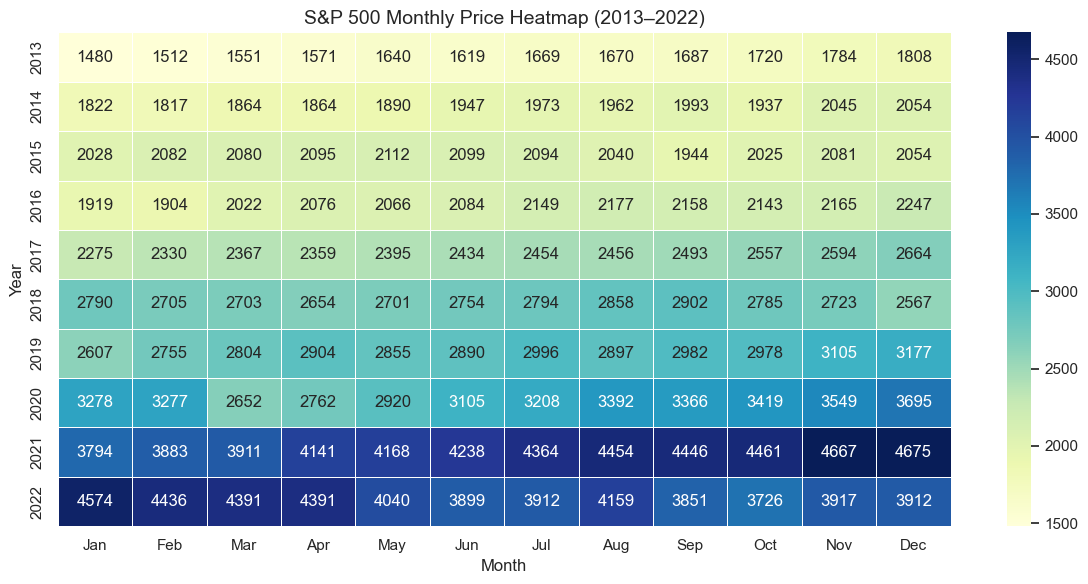

In [11]:
# Create a heatmap to visualize yearly patterns
# Pivot the data to create a year x month matrix


heatmap_data = monthly_data.copy()
heatmap_data['Year'] = heatmap_data.index.year
heatmap_data['Month'] = heatmap_data.index.strftime('%b')  # abbreviated month names

# Create pivot table (rows = Year, columns = Month)
heatmap_matrix = heatmap_data.pivot(index='Year', columns='Month', values='Price')


month_order_heat = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

heatmap_matrix = heatmap_data.pivot(index='Year', columns='Month', values='Price')
heatmap_matrix = heatmap_matrix[month_order_heat]

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_matrix, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='.0f')
plt.title('S&P 500 Monthly Price Heatmap (2013–2022)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

# Stationarity Testing and Transformation

Perform rolling statistics and the Augmented Dickey-Fuller test to see if the series is stationary.

If needed, apply log transformations or differencing to stabilize trends and variance.

In [12]:
# Step 1: Extract the time series
ts_data = monthly_data['Price']

# Step 2: ADF test on original series - Augmented Dickey-Fuller 
adf_result = adfuller(ts_data.dropna())
print("ADF Test on Original Series")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print("-" * 40)

ADF Test on Original Series
ADF Statistic: -0.7734
p-value: 0.8268
----------------------------------------


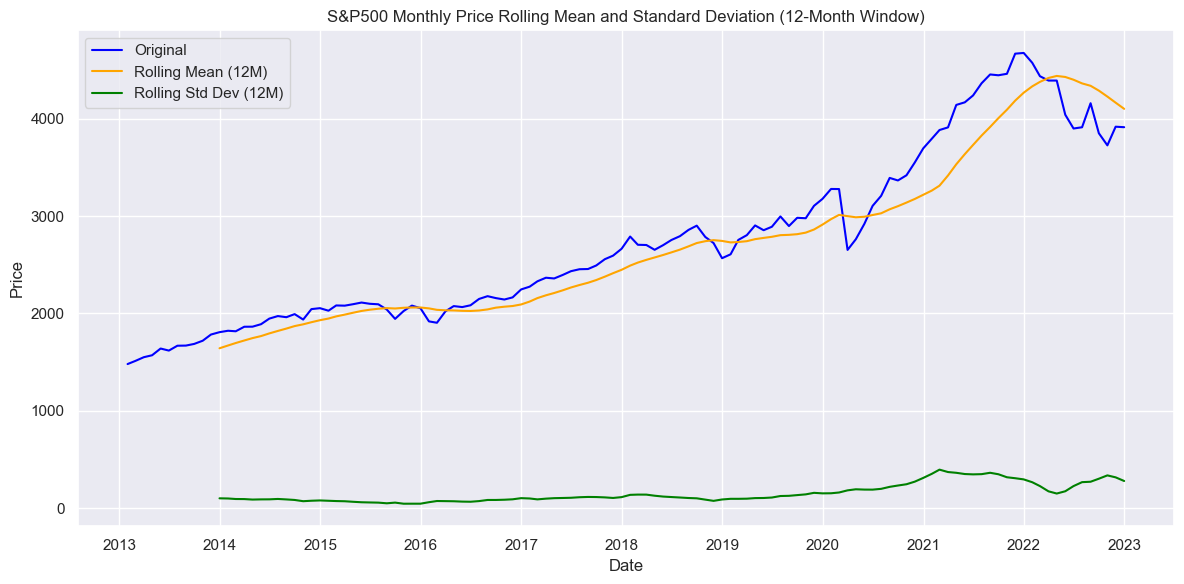

In [13]:
# Rolling statistics
rolling_mean = ts_data.rolling(window=12).mean()
rolling_std = ts_data.rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Original', color='blue')
plt.plot(rolling_mean, label='Rolling Mean (12M)', color='orange')
plt.plot(rolling_std, label='Rolling Std Dev (12M)', color='green')
plt.title('S&P500 Monthly Price Rolling Mean and Standard Deviation (12-Month Window)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
ts_data.head()

Date
2013-01-31    1480.395240
2013-02-28    1512.311581
2013-03-31    1550.828986
2013-04-30    1570.702265
2013-05-31    1639.842723
Freq: ME, Name: Price, dtype: float64

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

To assess the suitability of our monthly S&P 500 price series for time series modeling, we performed a stationarity test using the Augmented Dickey-Fuller (ADF) method. A stationary series — one with constant mean and variance over time — is a critical assumption for models like ARIMA.

The ADF test on the original series yielded a p-value of 0.8268, which is far above the 0.05 threshold. This indicates that the series is non-stationary, and we fail to reject the null hypothesis of a unit root.

This conclusion is further supported by the rolling statistics plot, which shows a strong upward trend in both the mean and variance over time. The rolling mean does not remain flat, and the standard deviation shows increasing volatility, particularly during periods of market expansion.

It's applied log Transformation to address this non-stationarity and stabilize the variance. This is particularly appropriate for financial time series like the S&P 500, where price increases tend to have a compounding effect over time. We then apply first-order differencing to remove trend and achieve stationarity in the transformed series. These transformations are essential to ensure the data meets the assumptions of classical time series models and to enable reliable forecasting of long-term index behavior.

In [15]:
# Log transformation
ts_log = np.log(ts_data)

# First-order differencing
ts_log_diff = ts_log.diff().dropna()

# ADF test on transformed series
adf_log_diff = adfuller(ts_log_diff)
print("ADF Test on Log-Differenced Series")
print(f"ADF Statistic: {adf_log_diff[0]:.4f}")
print(f"p-value: {adf_log_diff[1]:.4f}")
print("-" * 40)

ADF Test on Log-Differenced Series
ADF Statistic: -8.4695
p-value: 0.0000
----------------------------------------


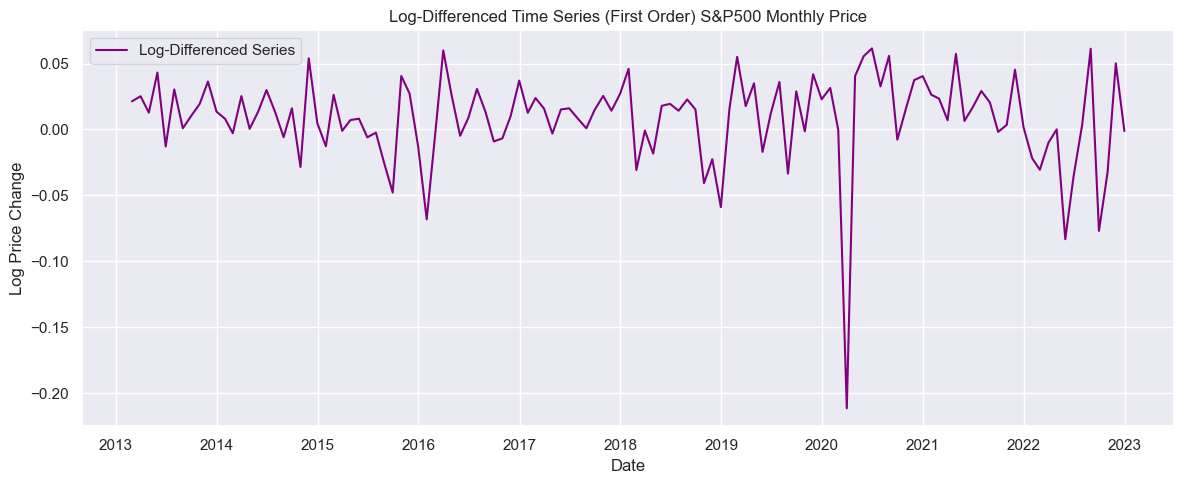

In [16]:
# Plot log-differenced series
plt.figure(figsize=(12, 5))
plt.plot(ts_log_diff, label='Log-Differenced Series', color='purple')
plt.title('Log-Differenced Time Series (First Order) S&P500 Monthly Price')
plt.xlabel('Date')
plt.ylabel('Log Price Change')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
ts_log_diff.head()

Date
2013-02-28    0.021330
2013-03-31    0.025150
2013-04-30    0.012733
2013-05-31    0.043078
2013-06-30   -0.012932
Freq: ME, Name: Price, dtype: float64

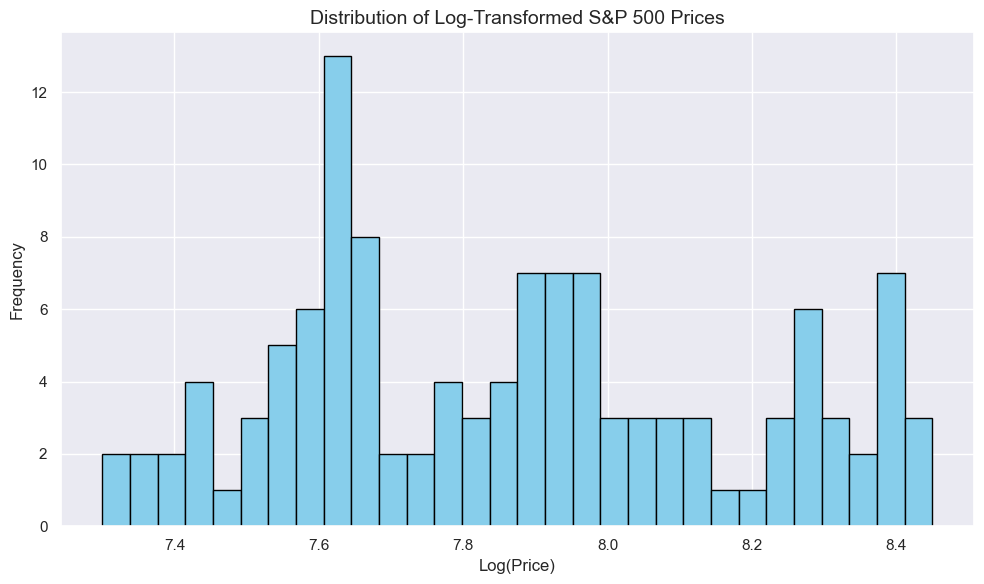

In [18]:
# Plot histogram Log data
plt.figure(figsize=(10, 6))
plt.hist(ts_log, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Log-Transformed S&P 500 Prices', fontsize=14)
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

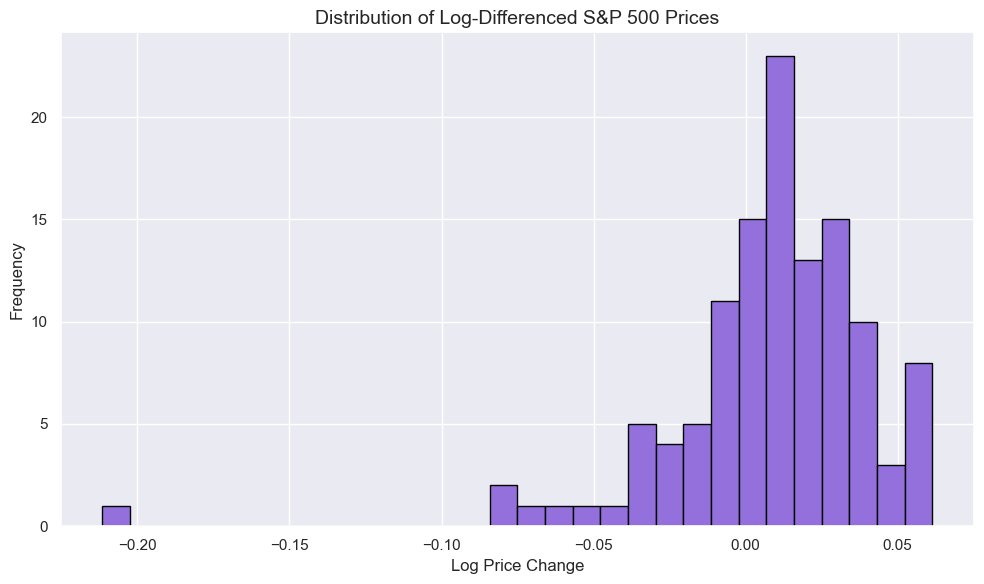

In [19]:
# Plot histogram log data diff
plt.figure(figsize=(10, 6))
plt.hist(ts_log_diff, bins=30, color='mediumpurple', edgecolor='black')
plt.title('Distribution of Log-Differenced S&P 500 Prices', fontsize=14)
plt.xlabel('Log Price Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

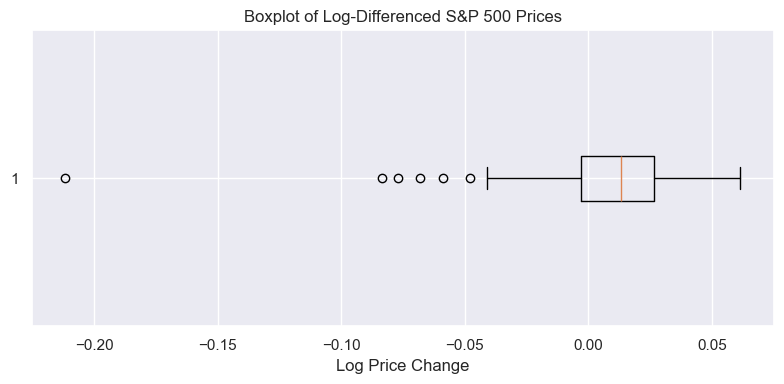

In [20]:
plt.figure(figsize=(8, 4))
plt.boxplot(ts_log_diff, vert=False)
plt.title("Boxplot of Log-Differenced S&P 500 Prices")
plt.xlabel("Log Price Change")
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
ts_log_diff.min()

-0.21156175059459237

In [22]:
ts_log_diff.max()

0.061454982690429816

In [23]:
outlier_date = ts_log_diff.idxmin()
outlier_value = ts_log_diff.min()

print(f"Outlier Date: {outlier_date.strftime('%B %Y')}")
print(f"Log Price Change: {outlier_value:.4f}")

Outlier Date: March 2020
Log Price Change: -0.2116


In [24]:
ts_log_diff_sorted = ts_log_diff.sort_values()
print(ts_log_diff_sorted.head(5))

Date
2020-03-31   -0.211562
2022-05-31   -0.083291
2022-09-30   -0.076961
2016-01-31   -0.068233
2018-12-31   -0.058962
Name: Price, dtype: float64


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
**Outlier Detection and Justification for Adjustment**

During the exploratory analysis of the log-differenced monthly S\&P 500 prices, we visualized the distribution of returns using both plots (histogram and boxplot). The histogram showed a right-skewed distribution, with most log returns clustering around 0.00 to 0.02. However, a **notable extreme left-tail value** appeared in the histogram, suggesting the presence of a significant outlier.

The **boxplot of log-differenced prices** reinforced this observation, where a single extreme value was plotted far from the lower whisker boundary—visually and statistically confirming it as an outlier.

Upon further investigation, this extreme value occurred in **March 2020**, with a log return of **-0.2116**, representing the market crash during the onset of the COVID-19 pandemic. This anomaly corresponds to the steepest monthly drop in the index over the entire 10-year period.

To validate this further, we examined the bottom five log-differenced values and the ranking confirms that March 2020 is a statistical outlier, with a drop nearly three times larger than the next largest negative return. All other extreme values fall within a much narrower and more typical range of market behavior.

This type of event is **not representative** of regular market behavior and reflects an **exogenous shock**—a black swan event—rather than a structural pattern in the time series.

* The **boxplot and histogram** confirm this data point as a severe outlier,
* It is **isolated** in time and not repeated before or after,
* And it is **driven by a unique, one-time global crisis** rather than a recurring market signal,

I will treat this observation as **anomalous** for the purposes of model training and forecasting. Therefore, we will replace the March 2020 value with the mean of April and February 2020 of the log-differenced series to prevent the model from overfitting to an event that is unlikely to recur in the same form. This preprocessing decision helps improve the robustness and generalizability of our time series model while aligning with the business objective of medium-to-long-term investment planning, rather than reacting to short-term, crisis-driven volatility.

In [25]:
# Replace it using linear interpolation between Feb and Apr 2020
prev_val = ts_log_diff.loc['2020-02-29']
next_val = ts_log_diff.loc['2020-04-30']
interpolated_val = (prev_val + next_val) / 2

# Apply replacement
ts_log_diff.loc['2020-03-31'] = interpolated_val

# Confirm the new value
ts_log_diff.loc['2020-03-31']

0.020106236407213096

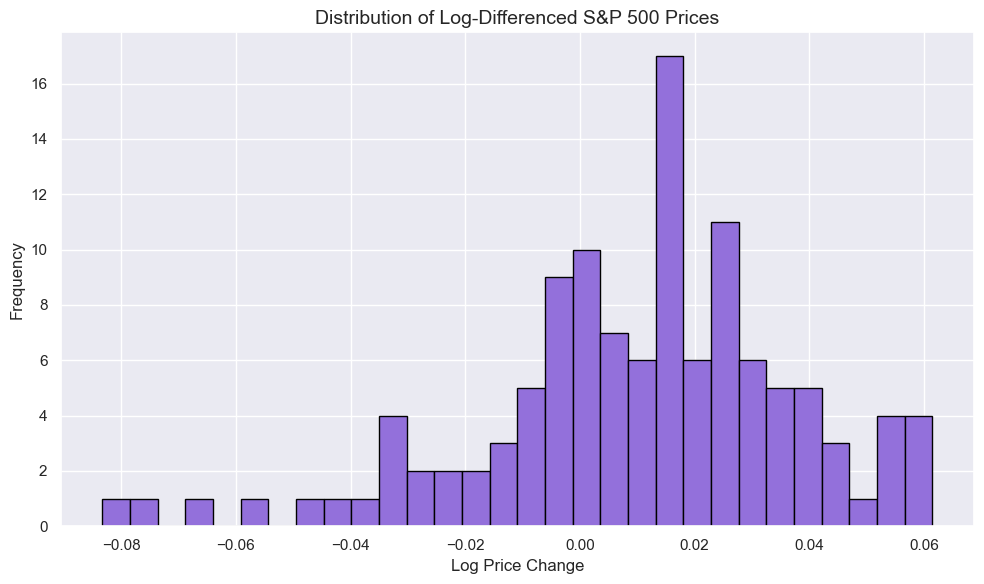

In [26]:
# Plot histogram log data diff - After dealing with Outlier
plt.figure(figsize=(10, 6))
plt.hist(ts_log_diff, bins=30, color='mediumpurple', edgecolor='black')
plt.title('Distribution of Log-Differenced S&P 500 Prices', fontsize=14)
plt.xlabel('Log Price Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

After replacing the anomalous March 2020 log return using linear interpolation between February and April, the updated histogram of log-differenced prices (see figure) reflects a more balanced and unimodal distribution. The extreme left-tail has been effectively corrected, reducing distortion without flattening genuine variation. This adjustment enhances the dataset’s statistical integrity and stationarity, improving the reliability of future time series modeling and aligning with the business goal of robust, long-term forecasting.

# Time Series Decomposition & Diagnose Patterns

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
To better understand the underlying structure of the S&P 500 index over time, we decomposed the monthly price series into three components: trend, seasonality, and residual noise, using a multiplicative model and a 12-month cycle.

The trend component captures the long-term upward trajectory of the index.

The seasonal component reveals repeating patterns across years, suggesting potential monthly or quarterly investment behaviors, such as end-of-year adjustments or mid-year corrections.

The residual component represents short-term noise and shocks, isolated from structural movements.

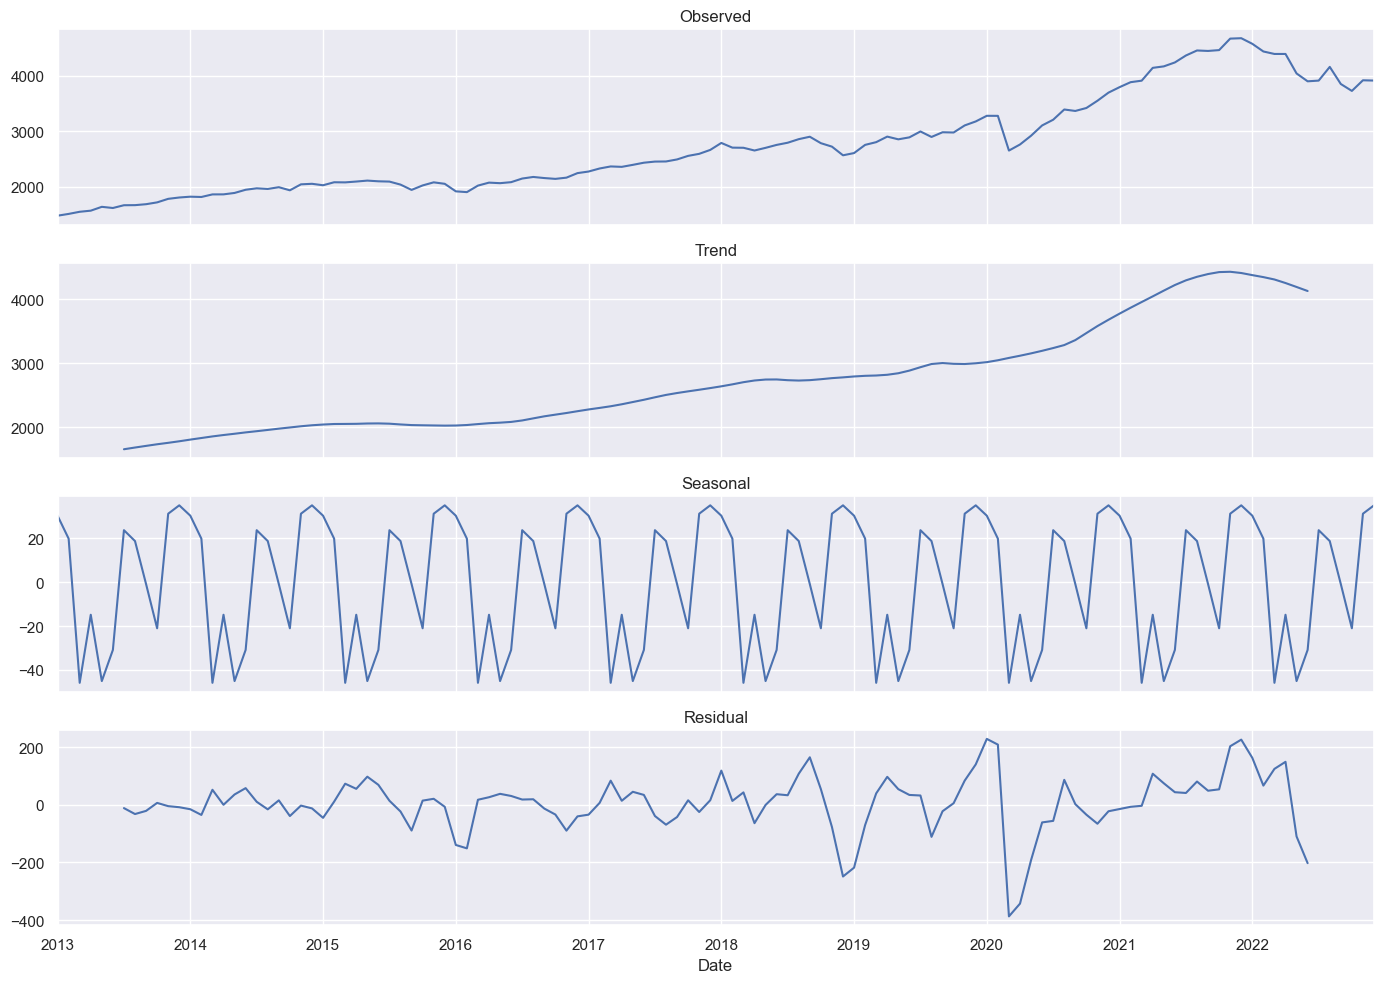

In [27]:
# Time Series Decomposition - additive

monthly_data.index = pd.DatetimeIndex(monthly_data.index, freq='M')

# Decompose the series with a 12-month seasonal cycle
decomposition = seasonal_decompose(monthly_data['Price'], model='additive')

# Plot the components
fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
decomposition.observed.plot(ax=axes[0], title='Observed')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

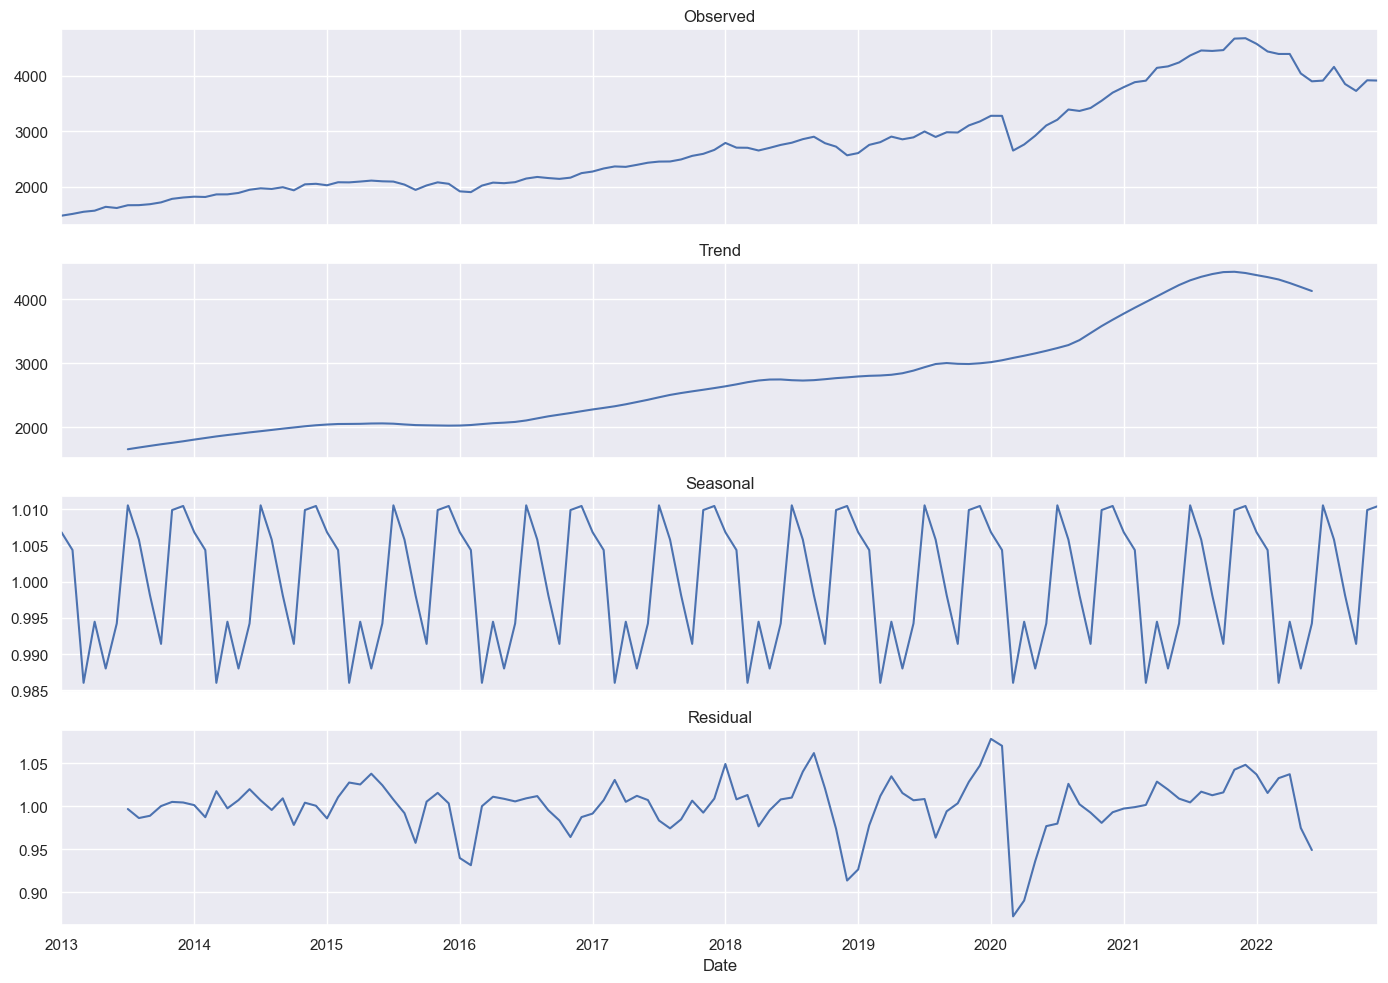

In [28]:
# Time Series Decomposition - multiplicative

monthly_data.index = pd.DatetimeIndex(monthly_data.index, freq='M')

# Decompose the series with a 12-month seasonal cycle
decomposition = seasonal_decompose(monthly_data['Price'], model='multiplicative')

# Plot the components
fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
decomposition.observed.plot(ax=axes[0], title='Observed')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

The dip around March 2020 is the COVID-19 market crash, which you previously handled as an outlier

The seasonal component confirms the presence of annual cyclic behavior, which can be leveraged in forecasting and investment planning.

The trend shows a persistent growth pattern, aligned with long-term equity market expectations.

Residual spikes highlight exogenous events, further justifying the earlier decision to handle March 2020 as an outlier.

The additive decomposition underrepresents the seasonality in later years (smaller spam), and overstates residuals during high-price periods (larger). Multiplicative model in general better captured scaling seasonal fluctuations and it's stable relative residuals. Therefore, the multiplicative model remains the more appropriate choice for this time series.

# Autocorrelation Analysis

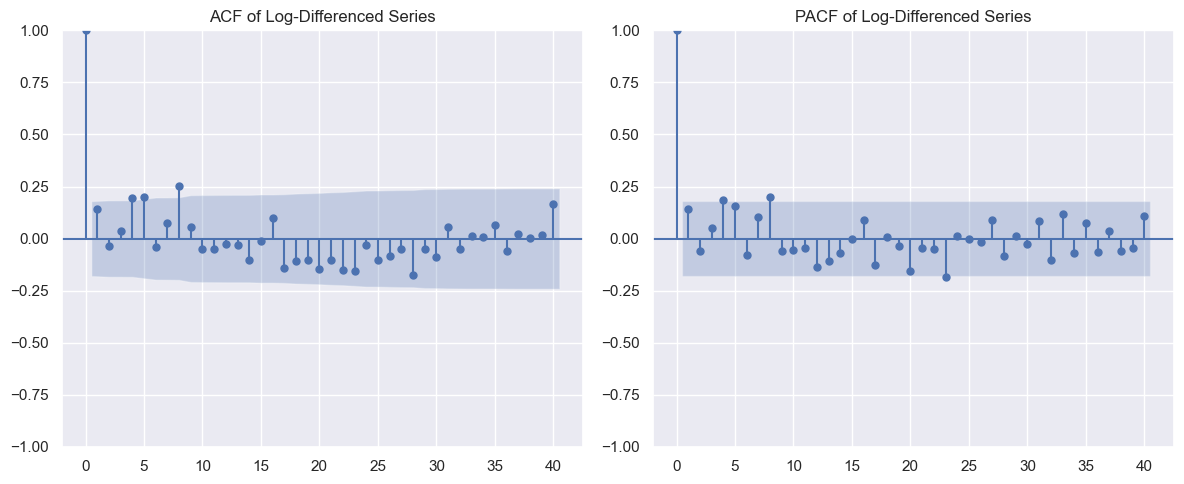

In [29]:
# ACF and PACF Plotting (to justify ARIMA parameters)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(ts_log_diff.dropna(), lags=40, ax=plt.gca())
plt.title("ACF of Log-Differenced Series")

plt.subplot(1, 2, 2)
plot_pacf(ts_log_diff.dropna(), lags=40, method='ywm', ax=plt.gca())
plt.title("PACF of Log-Differenced Series")
plt.tight_layout()
plt.show()

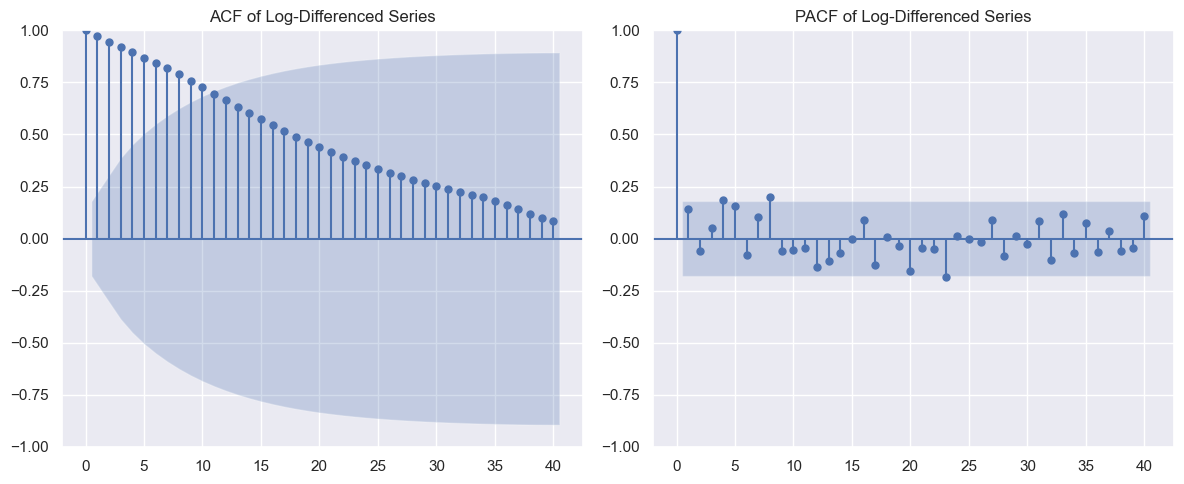

In [30]:
# ACF and PACF Plotting (to justify ARIMA parameters) With no diff

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(ts_log.dropna(), lags=40, ax=plt.gca())
plt.title("ACF of Log-Differenced Series")

plt.subplot(1, 2, 2)
plot_pacf(ts_log_diff.dropna(), lags=40, method='ywm', ax=plt.gca())
plt.title("PACF of Log-Differenced Series")
plt.tight_layout()
plt.show()

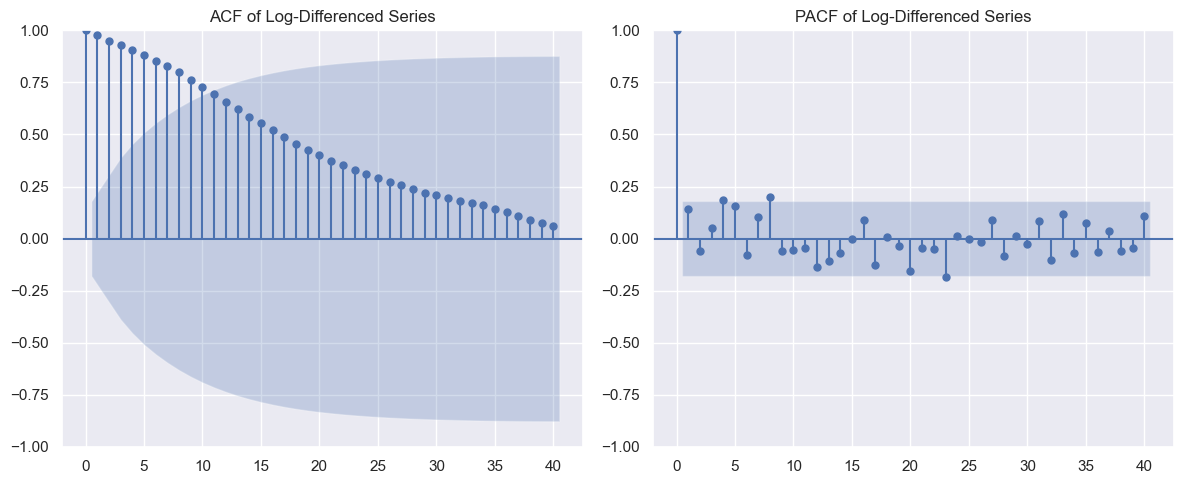

In [31]:
# ACF and PACF Plotting (to justify ARIMA parameters) With no diff no log

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(ts_data.dropna(), lags=40, ax=plt.gca())
plt.title("ACF of Log-Differenced Series")

plt.subplot(1, 2, 2)
plot_pacf(ts_log_diff.dropna(), lags=40, method='ywm', ax=plt.gca())
plt.title("PACF of Log-Differenced Series")
plt.tight_layout()
plt.show()

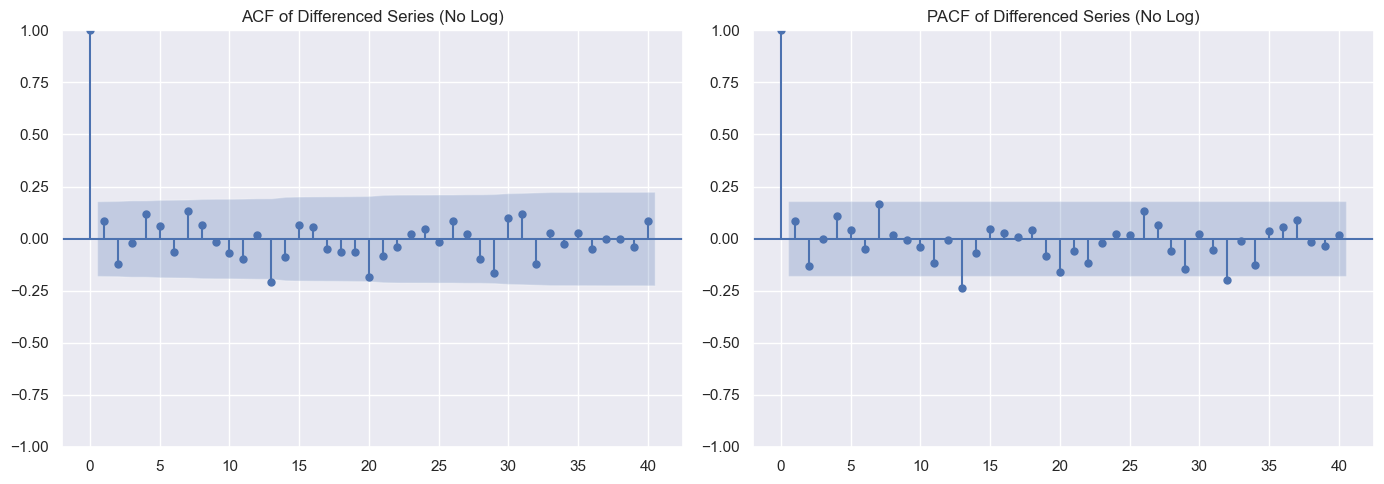

In [32]:
# Apply first-order differencing (no log)
ts_diff_only = monthly_data['Price'].diff().dropna()

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(ts_diff_only, ax=axes[0], lags=40)
axes[0].set_title("ACF of Differenced Series (No Log)")
plot_pacf(ts_diff_only, ax=axes[1], lags=40)
axes[1].set_title("PACF of Differenced Series (No Log)")
plt.tight_layout()
plt.show()

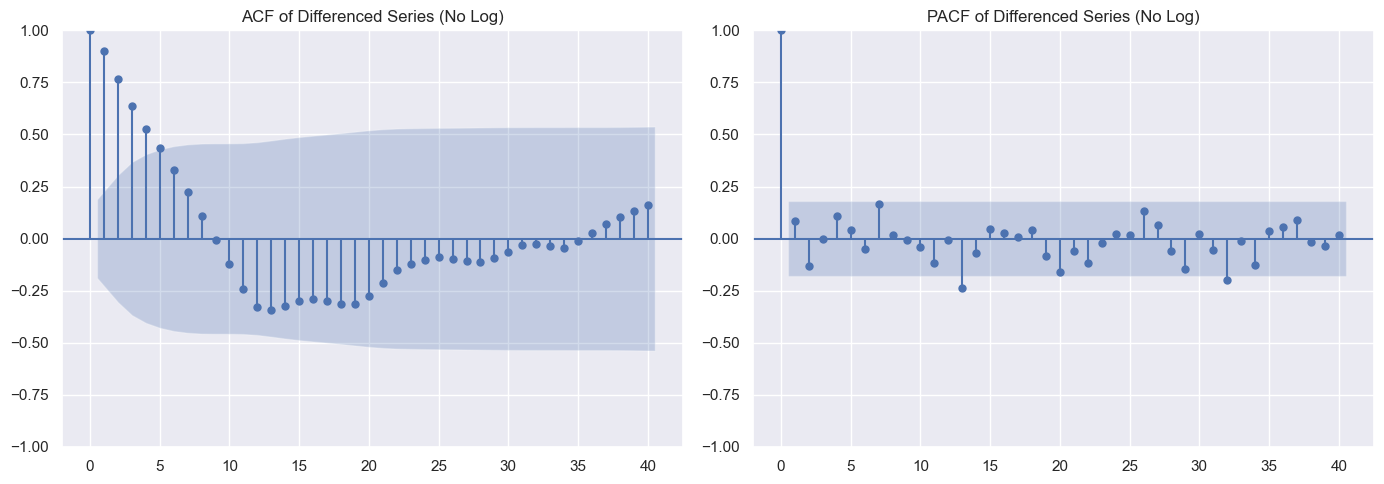

In [33]:
# Apply 12-month seasonal differencing
ts_seasonal_diff = monthly_data['Price'].diff(12).dropna()

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(ts_seasonal_diff, ax=axes[0], lags=40)
axes[0].set_title("ACF of Differenced Series (No Log)")
plot_pacf(ts_diff_only, ax=axes[1], lags=40)
axes[1].set_title("PACF of Differenced Series (No Log)")
plt.tight_layout()
plt.show()

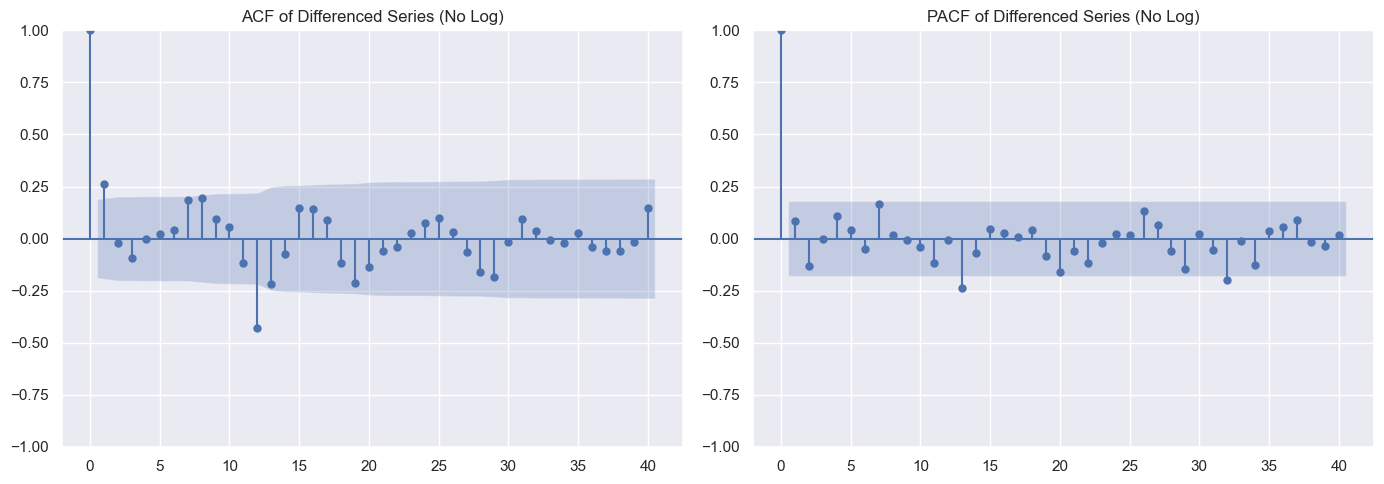

In [34]:
# Combine # First apply seasonal differencing, then first-order differencing
ts_seasonal_first_diff = ts_seasonal_diff.diff().dropna()

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(ts_seasonal_first_diff, ax=axes[0], lags=40)
axes[0].set_title("ACF of Differenced Series (No Log)")
plot_pacf(ts_diff_only, ax=axes[1], lags=40)
axes[1].set_title("PACF of Differenced Series (No Log)")
plt.tight_layout()
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

To ensure we build a robust and reliable forecasting model, we will systematically test multiple time series models under various configurations. This process allows us to identify the model that best captures the underlying structure of the S&P 500 index and aligns with our business objective of medium-to-long-term investment planning. It will be explored data transformation, stationary treatment, model class and complexity (ARIMA / SARIMAX) and parameters combination (MA / AR / I)

Modeling Plan Based on ACF/PACF Diagnostics

With Log transformation

1. ARIMA(1,1,1) – Baseline model. ACF and PACF show spikes at lag 1 → justifies a basic ARMA structure on differenced data.
2. ARIMA(5,1,0) – Higher-order AR model. PACF shows significance up to lag 5 → suggests strong autoregressive structure.
3. ARIMA(0,1,5) – Higher-order MA model. ACF decays slowly, motivating a model with more moving average lags.
4. ARIMA(5,1,5) – Extended ARIMA model. Captures both AR and MA influence over multiple lags. Useful to test possible overfitting vs. accuracy gain.

Without Log transformation

5. ARIMA(2,1,0) – No MA component. ACF shows strong AR lags, PACF tapers off quickly.
6. ARIMA(1,1,0) – Pure AR(1) model. Good as a simple benchmark with minimal parameters.
7. ARIMA(0,1,1) – Pure MA(1) model. Minimalist benchmark from MA side, useful for contrast.
8. SARIMA(0,1,0)(0,1,1,12) – Seasonal model. Based on observed annual (lag-12) spike in ACF. Combines seasonal and first-order differencing to capture yearly seasonality. Only one seasonal model is tested here to focus the comparison.

In [35]:
# Reusable function

def evaluate_arima_model(series, order, steps_ahead, true_values=None, apply_log=False, model_name=None):
    """
    Fits ARIMA model, forecasts, and returns evaluation metrics and AIC/BIC.

    Parameters:
        series (pd.Series): Original time series data.
        order (tuple): ARIMA(p,d,q) order.
        steps_ahead (int): Number of steps to forecast.
        true_values (pd.Series): Actual future values for error evaluation.
        apply_log (bool): Whether to apply log transformation.
        model_name (str): Optional name for the model.

    Returns:
        dict: Model evaluation results.
    """
    # Log transform if needed
    ts = np.log(series) if apply_log else series.copy()

    # Fit model
    model = ARIMA(ts, order=order)
    model_fit = model.fit()

    # Forecast
    forecast = model_fit.forecast(steps=steps_ahead)
    forecast_final = np.exp(forecast) if apply_log else forecast

    # Align forecast with true values if provided
    if true_values is not None:
        forecast_final.index = true_values.index
        mae = mean_absolute_error(true_values, forecast_final)
        rmse = np.sqrt(mean_squared_error(true_values, forecast_final))
        mape = np.mean(np.abs((true_values - forecast_final) / true_values)) * 100
    else:
        mae = rmse = mape = np.nan

    return {
        'Model': model_name if model_name else f'ARIMA{order}' + (' [Log]' if apply_log else ''),
        'AIC': round(model_fit.aic, 2),
        'BIC': round(model_fit.bic, 2),
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'MAPE': round(mape, 2)
    }

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

We evaluated model performance by training on historical data and reserving the last 12 months as a test set. This simulates a real-world scenario: forecasting future values and comparing them to actual outcomes. Using this setup ensures realistic, forward-looking evaluation with metrics like MAE, RMSE, and MAPE on unseen data.

# Models with log Transformation

In [36]:
model_results = []

In [37]:
true_future = monthly_data['Price'][-12:]

result_111_log = evaluate_arima_model(
    series=monthly_data['Price'],
    order=(1,1,1),
    steps_ahead=12,                              # 1 year of forecast
    true_values=true_future,
    apply_log=True,                              # log transformation applied
    model_name='ARIMA(1,1,1) [Log]')

# Append result dictionary to the results list
model_results.append(result_111_log)

result_111_log    

{'Model': 'ARIMA(1,1,1) [Log]',
 'AIC': -454.11,
 'BIC': -445.78,
 'MAE': 235.8,
 'RMSE': 332.04,
 'MAPE': 5.44}

In [38]:
true_future = monthly_data['Price'][-12:]

result_511_log = evaluate_arima_model(
    series=monthly_data['Price'],
    order=(5,1,1),
    steps_ahead=12,                              # 1 year of forecast
    true_values=true_future,
    apply_log=True,                              # log transformation applied
    model_name='ARIMA(5,1,1) [Log]')

# Append result dictionary to the results list
model_results.append(result_511_log)

result_511_log    

{'Model': 'ARIMA(5,1,1) [Log]',
 'AIC': -449.0,
 'BIC': -429.54,
 'MAE': 257.17,
 'RMSE': 351.36,
 'MAPE': 5.94}

In [39]:
true_future = monthly_data['Price'][-12:]

result_115_log = evaluate_arima_model(
    series=monthly_data['Price'],
    order=(1,1,5),
    steps_ahead=12,                              # 1 year of forecast
    true_values=true_future,
    apply_log=True,                              # log transformation applied
    model_name='ARIMA(1,1,5) [Log]')

# Append result dictionary to the results list
model_results.append(result_115_log)

result_115_log    

{'Model': 'ARIMA(1,1,5) [Log]',
 'AIC': -451.96,
 'BIC': -432.51,
 'MAE': 269.69,
 'RMSE': 369.26,
 'MAPE': 6.23}

In [40]:
true_future = monthly_data['Price'][-12:]

result_515_log = evaluate_arima_model(
    series=monthly_data['Price'],
    order=(5,1,5),
    steps_ahead=12,                              # 1 year of forecast
    true_values=true_future,
    apply_log=True,                              # log transformation applied
    model_name='ARIMA(5,1,5) [Log]')

# Append result dictionary to the results list
model_results.append(result_515_log)

result_515_log    

{'Model': 'ARIMA(5,1,5) [Log]',
 'AIC': -441.54,
 'BIC': -410.96,
 'MAE': 341.35,
 'RMSE': 418.63,
 'MAPE': 7.99}

In [41]:
summary_table = pd.DataFrame(model_results)
summary_table.sort_values(by='AIC')

,Model,AIC,BIC,MAE,RMSE,MAPE
0,"ARIMA(1,1,1) [Log]",-454.11,-445.78,235.80,332.04,5.44
2,"ARIMA(1,1,5) [Log]",-451.96,-432.51,269.69,369.26,6.23
1,"ARIMA(5,1,1) [Log]",-449.00,-429.54,257.17,351.36,5.94
3,"ARIMA(5,1,5) [Log]",-441.54,-410.96,341.35,418.63,7.99


# Models without log Transformation

In [42]:
true_future = monthly_data['Price'][-12:]

result_210 = evaluate_arima_model(
    series=monthly_data['Price'],
    order=(2,1,0),
    steps_ahead=12,                              # 1 year of forecast
    true_values=true_future,
    apply_log=False,                              # no log transformation applied
    model_name='ARIMA(2,1,0)')

# Append result dictionary to the results list
model_results.append(result_210)

result_210

{'Model': 'ARIMA(2,1,0)',
 'AIC': 1455.32,
 'BIC': 1463.66,
 'MAE': 243.07,
 'RMSE': 339.44,
 'MAPE': 5.61}

In [43]:
true_future = monthly_data['Price'][-12:]

result_110 = evaluate_arima_model(
    series=monthly_data['Price'],
    order=(1,1,0),
    steps_ahead=12,                              # 1 year of forecast
    true_values=true_future,
    apply_log=False,                              # no log transformation applied
    model_name='ARIMA(1,1,0)')

# Append result dictionary to the results list
model_results.append(result_110)

result_110

{'Model': 'ARIMA(1,1,0)',
 'AIC': 1454.51,
 'BIC': 1460.07,
 'MAE': 232.25,
 'RMSE': 327.74,
 'MAPE': 5.36}

In [44]:
true_future = monthly_data['Price'][-12:]

result_011 = evaluate_arima_model(
    series=monthly_data['Price'],
    order=(0,1,1),
    steps_ahead=12,                              # 1 year of forecast
    true_values=true_future,
    apply_log=False,                              # no log transformation applied
    model_name='ARIMA(0,1,1)')

# Append result dictionary to the results list
model_results.append(result_011)

result_011

{'Model': 'ARIMA(0,1,1)',
 'AIC': 1454.15,
 'BIC': 1459.71,
 'MAE': 234.26,
 'RMSE': 330.08,
 'MAPE': 5.41}

## SARIMA

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define test set: last 12 months of actual values
true_future = monthly_data['Price'][-12:]

# Fit SARIMA model
sarima_model = SARIMAX(
    monthly_data['Price'][:-12],  # training data
    order=(1,1,0),
    seasonal_order=(1,1,0,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_fit = sarima_model.fit()

# Forecast
sarima_forecast = sarima_fit.forecast(steps=12)

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(true_future, sarima_forecast)
rmse = np.sqrt(mean_squared_error(true_future, sarima_forecast))
mape = np.mean(np.abs((true_future - sarima_forecast) / true_future)) * 100

# Store results
result_sarima = {
    'Model': 'SARIMA(1,1,0)(1,1,0,12)',
    'AIC': sarima_fit.aic,
    'BIC': sarima_fit.bic,
    'MAE': mae,
    'RMSE': rmse,
    'MAPE': mape
}

# Append to results list
model_results.append(result_sarima)

# Show result
result_sarima

{'Model': 'SARIMA(1,1,0)(1,1,0,12)',
 'AIC': 1010.7670638658407,
 'BIC': 1017.9872216076334,
 'MAE': 755.4433914662244,
 'RMSE': 890.2129734834841,
 'MAPE': 19.161858914330335}

# Random Walk diff

In [46]:
true_future = monthly_data['Price'][-12:]

result_010 = evaluate_arima_model(
    series=monthly_data['Price'],
    order=(0,1,0),
    steps_ahead=12,                              # 1 year of forecast
    true_values=true_future,
    apply_log=False,                              # no log transformation applied
    model_name='ARIMA(0,1,0)')

# Append result dictionary to the results list
model_results.append(result_010)

result_010

{'Model': 'ARIMA(0,1,0)',
 'AIC': 1454.09,
 'BIC': 1456.87,
 'MAE': 232.03,
 'RMSE': 327.37,
 'MAPE': 5.36}

In [47]:
summary_table = pd.DataFrame(model_results)
summary_table.sort_values(by='AIC')

,Model,AIC,BIC,MAE,RMSE,MAPE
0,"ARIMA(1,1,1) [Log]",-454.110000,-445.780000,235.800000,332.040000,5.440000
2,"ARIMA(1,1,5) [Log]",-451.960000,-432.510000,269.690000,369.260000,6.230000
1,"ARIMA(5,1,1) [Log]",-449.000000,-429.540000,257.170000,351.360000,5.940000
3,"ARIMA(5,1,5) [Log]",-441.540000,-410.960000,341.350000,418.630000,7.990000
7,"SARIMA(1,1,0)(1,1,0,12)",1010.767064,1017.987222,755.443391,890.212973,19.161859
8,"ARIMA(0,1,0)",1454.090000,1456.870000,232.030000,327.370000,5.360000
6,"ARIMA(0,1,1)",1454.150000,1459.710000,234.260000,330.080000,5.410000
5,"ARIMA(1,1,0)",1454.510000,1460.070000,232.250000,327.740000,5.360000
4,"ARIMA(2,1,0)",1455.320000,1463.660000,243.070000,339.440000,5.610000


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
This analysis aimed to identify the most reliable forecasting model for the S&P 500 monthly closing prices from 2013 to 2022, supporting strategic medium-to-long-term investment planning. To achieve this, we rigorously explored and evaluated multiple time series modeling approaches, following a structured process grounded in best practices.

Modeling Strategy and Justification

We tested a diverse set of models using:
- Log Transformation vs. No Transformation to manage potential heteroscedasticity.
- Differencing (Regular and Seasonal) to ensure stationarity.
- ARIMA and SARIMA family models to capture short-term autocorrelation and seasonal effects.
- A Random Walk (ARIMA(0,1,0)) as a naïve benchmark.

Each model was:
- Fitted using the training set (pre-2022),
- Used to forecast the final 12 months (2022),
- Evaluated using performance metrics: MAE, RMSE, MAPE, and model fit indicators: AIC and BIC.

Final Recommendation: ARIMA(0,1,0) — Random Walk: The simplest model, ARIMA(0,1,0), outperformed more complex models in terms of forecast accuracy. It achieved the lowest MAE (232.03), lowest RMSE (327.37), and lowest MAPE (5.36%), tying with ARIMA(1,1,0), but with fewer parameters and lower complexity. This model assumes that future prices are equal to the previous price plus noise—a strategy often used in financial markets as a baseline, and here it proves hard to beat.

For practical forecasting of S&P 500 monthly values, the ARIMA(0,1,0) random walk model is the top performer. It balances interpretability with strong empirical performance, offering a solid foundation for future model extensions or risk-adjusted forecasting.

Key Takeaways:
- Log transformation improves AIC/BIC but doesn’t always improve forecast accuracy.
- Complex models (e.g., ARIMA(5,1,5)) risk overfitting and underperform in real-world forecasts.
- SARIMA underperformed—no consistent seasonality was found in this monthly S&P 500 series.
- The Random Walk model (ARIMA(0,1,0)) is simple, interpretable, and effective for short-to-medium horizon forecasts.

# Model Diagnostics

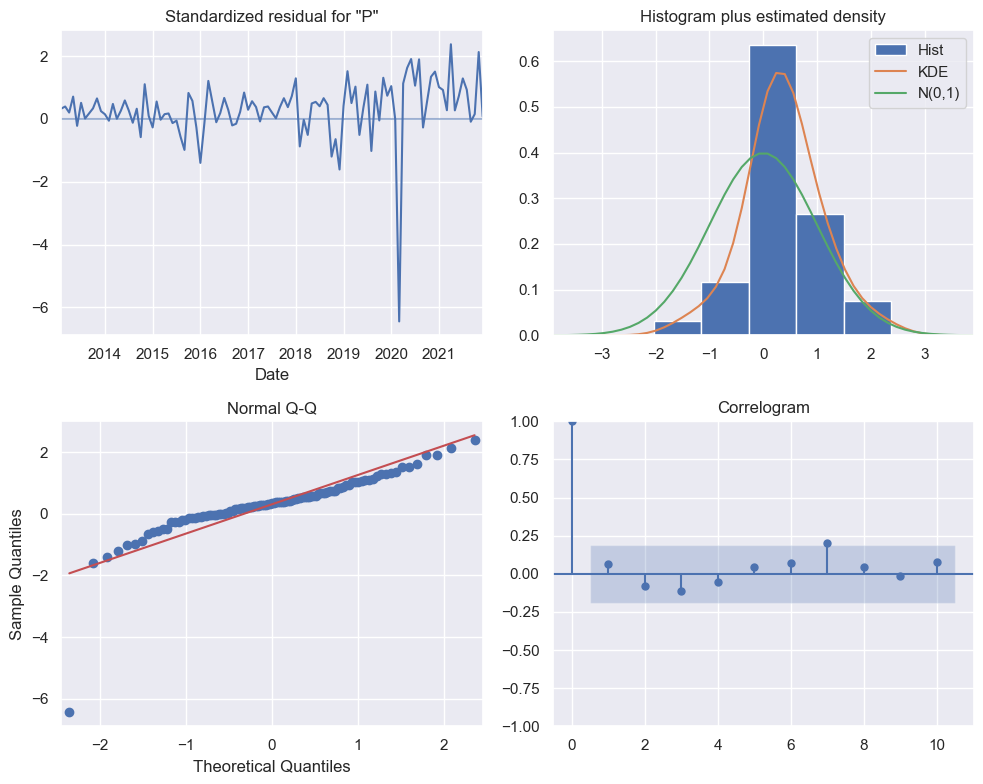

In [48]:
# Model Diagnostics

model = ARIMA(monthly_data['Price'][:-12], order=(0,1,0))
model_fit = model.fit()

model_fit.plot_diagnostics(figsize=(10, 8))
plt.tight_layout()
plt.show()

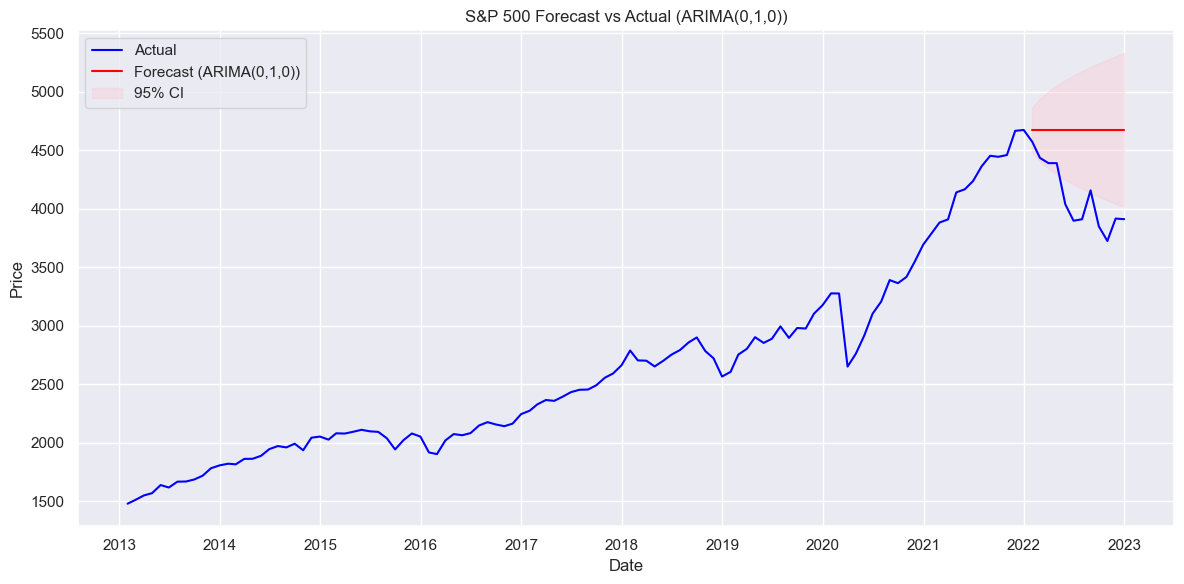

In [49]:
test = monthly_data['Price'][-12:]
forecast_result = model_fit.get_forecast(steps=12)
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Price'], label='Actual', color='blue')
plt.plot(test.index, forecast_mean, label='Forecast (ARIMA(0,1,0))', color='red')
plt.fill_between(test.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3, label='95% CI')
plt.title('S&P 500 Forecast vs Actual (ARIMA(0,1,0))')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
monthly_data['Price'].tail(15)

Date
2021-10-31    4460.707078
2021-11-30    4667.386649
2021-12-31    4674.772772
2022-01-31    4573.815454
2022-02-28    4435.980494
2022-03-31    4391.265264
2022-04-30    4391.295996
2022-05-31    4040.360003
2022-06-30    3898.946684
2022-07-31    3911.729492
2022-08-31    4158.563084
2022-09-30    3850.520496
2022-10-31    3726.050956
2022-11-30    3917.488595
2022-12-31    3912.380952
Freq: ME, Name: Price, dtype: float64

In [51]:
forecast_result.predicted_mean

2022-01-31    4674.772772
2022-02-28    4674.772772
2022-03-31    4674.772772
2022-04-30    4674.772772
2022-05-31    4674.772772
2022-06-30    4674.772772
2022-07-31    4674.772772
2022-08-31    4674.772772
2022-09-30    4674.772772
2022-10-31    4674.772772
2022-11-30    4674.772772
2022-12-31    4674.772772
Freq: ME, Name: predicted_mean, dtype: float64

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Since the ARIMA(0,1,0) model represents a random walk, the forecast at each future step is simply the last observed value from the training data. This confirms that the model assumes no trend or seasonality, and that changes in the time series are entirely unpredictable. Therefore, the predicted value remains constant over the forecast horizon.

For example, the last value in the training data—December 2021 S&P 500 = 4674.77—becomes the forecast for all 12 future periods. This illustrates the nature of the random walk model and its core assumption: the best estimate of tomorrow’s price is today’s price.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Model Extension Justification**

Since the best-performing model in our initial comparison was the random walk model (ARIMA(0,1,0)), this suggests that the S&P 500 price series behaves similarly to a non-stationary process with no clear autoregressive or moving average structure. However, to validate this finding and ensure we are not overlooking simple yet potentially informative dynamics, we proceed to test the next two simplest models:

ARIMA(1,1,0) — introducing a first-order autoregressive (AR) component

ARIMA(0,1,1) — introducing a first-order moving average (MA) component

These models allow us to explore whether minimal structure beyond a pure random walk improves forecasting accuracy or model fit, while keeping model complexity low. This step enhances confidence in our model selection and supports robustness in decision-making.

In [52]:
true_future = monthly_data['Price'][-12:]

result_100 = evaluate_arima_model(
    series=monthly_data['Price'],
    order=(1,0,0),
    steps_ahead=12,                              # 1 year of forecast
    true_values=true_future,
    apply_log=False,                              # no log transformation applied
    model_name='ARIMA(1,0,0)')

# Append result dictionary to the results list
model_results.append(result_100)

result_100

{'Model': 'ARIMA(1,0,0)',
 'AIC': 1474.76,
 'BIC': 1483.13,
 'MAE': 248.21,
 'RMSE': 337.24,
 'MAPE': 5.74}

In [53]:
true_future = monthly_data['Price'][-12:]

result_001 = evaluate_arima_model(
    series=monthly_data['Price'],
    order=(0,0,1),
    steps_ahead=12,                              # 1 year of forecast
    true_values=true_future,
    apply_log=False,                              # no log transformation applied
    model_name='ARIMA(0,0,1)')

# Append result dictionary to the results list
model_results.append(result_001)

result_001

{'Model': 'ARIMA(0,0,1)',
 'AIC': 1826.94,
 'BIC': 1835.3,
 'MAE': 1279.6,
 'RMSE': 1305.0,
 'MAPE': 31.12}

In [54]:
summary_table = pd.DataFrame(model_results)
summary_table.sort_values(by='AIC')

,Model,AIC,BIC,MAE,RMSE,MAPE
0,"ARIMA(1,1,1) [Log]",-454.110000,-445.780000,235.800000,332.040000,5.440000
2,"ARIMA(1,1,5) [Log]",-451.960000,-432.510000,269.690000,369.260000,6.230000
1,"ARIMA(5,1,1) [Log]",-449.000000,-429.540000,257.170000,351.360000,5.940000
3,"ARIMA(5,1,5) [Log]",-441.540000,-410.960000,341.350000,418.630000,7.990000
7,"SARIMA(1,1,0)(1,1,0,12)",1010.767064,1017.987222,755.443391,890.212973,19.161859
8,"ARIMA(0,1,0)",1454.090000,1456.870000,232.030000,327.370000,5.360000
6,"ARIMA(0,1,1)",1454.150000,1459.710000,234.260000,330.080000,5.410000
5,"ARIMA(1,1,0)",1454.510000,1460.070000,232.250000,327.740000,5.360000
4,"ARIMA(2,1,0)",1455.320000,1463.660000,243.070000,339.440000,5.610000
9,"ARIMA(1,0,0)",1474.760000,1483.130000,248.210000,337.240000,5.740000


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Based on the last evaluation, the ARIMA(0,1,0) model continues to demonstrate the best overall performance among all tested configurations without log transformation. It achieves the lowest AIC (1454.09) and BIC (1456.87) among non-transformed models, the lowest MAE (232.03) and RMSE (327.37), tied with ARIMA(1,1,0), but with a simpler structure and a competitive MAPE (5.36%), matching the best-performing models.

This confirms that more complex models (including SARIMA and higher-order ARIMA configurations) do not significantly improve forecast accuracy for this dataset and may lead to overfitting. Thus, ARIMA(0,1,0) remains the most appropriate model based on both parsimony and performance, and will serve as our forecasting baseline.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

# Appendix

To enable a fair comparison with models fitted on the original scale, we will reverse the log transformation applied to the ARIMA(1,1,1) model. This allows us to compute forecast accuracy metrics—MAE, RMSE, and MAPE—in the original price units, making the results directly comparable with non-log-transformed models.

In [55]:
# let's adjuts the function evaluate_arima_model with a bit twist

def evaluate_arima_model_log_scaled(series, order, steps_ahead, true_values, model_name):
    """
    Evaluates a log-transformed ARIMA model by converting forecasts back to the original scale
    and computing performance metrics in that scale.
    """
    # Step 1: Apply log transformation to training data
    series_log = np.log(series[:-steps_ahead])
    
    # Step 2: Fit ARIMA model on log-transformed data
    model = ARIMA(series_log, order=order)
    model_fit = model.fit()
    
    # Step 3: Forecast in log scale
    forecast_log = model_fit.forecast(steps=steps_ahead)
    
    # Step 4: Convert forecast back to original scale
    # This step is key, since here we calculate the indicators in the same terms as the no transform funtions
    forecast_exp = np.exp(forecast_log)

    # Step 5: Calculate performance metrics in original scale
    mae = mean_absolute_error(true_values, forecast_exp)
    rmse = np.sqrt(mean_squared_error(true_values, forecast_exp))
    mape = np.mean(np.abs((true_values - forecast_exp) / true_values)) * 100
    
    # Step 6: Store results
    result = {
        'Model': model_name,
        'AIC': model_fit.aic,
        'BIC': model_fit.bic,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape
    }
    
    return result

In [56]:
# Define your test set (last 12 months of true values)
true_future = monthly_data['Price'][-12:]

# Evaluate the log-transformed model on original scale
result_111_log_real = evaluate_arima_model_log_scaled(
    series=monthly_data['Price'],
    order=(1, 1, 1),
    steps_ahead=12,
    true_values=true_future,
    model_name='ARIMA(1,1,1) [Log -> Original]'
)

# Append to your results table
model_results.append(result_111_log_real)

result_111_log_real

{'Model': 'ARIMA(1,1,1) [Log -> Original]',
 'AIC': -414.4183842374062,
 'BIC': -406.3998977340205,
 'MAE': 569.4571895008916,
 'RMSE': 629.3025276343765,
 'MAPE': 14.362682166105923}

In [57]:
summary_table = pd.DataFrame(model_results)
summary_table.sort_values(by='AIC')

,Model,AIC,BIC,MAE,RMSE,MAPE
0,"ARIMA(1,1,1) [Log]",-454.110000,-445.780000,235.800000,332.040000,5.440000
2,"ARIMA(1,1,5) [Log]",-451.960000,-432.510000,269.690000,369.260000,6.230000
1,"ARIMA(5,1,1) [Log]",-449.000000,-429.540000,257.170000,351.360000,5.940000
3,"ARIMA(5,1,5) [Log]",-441.540000,-410.960000,341.350000,418.630000,7.990000
11,"ARIMA(1,1,1) [Log -> Original]",-414.418384,-406.399898,569.457190,629.302528,14.362682
7,"SARIMA(1,1,0)(1,1,0,12)",1010.767064,1017.987222,755.443391,890.212973,19.161859
8,"ARIMA(0,1,0)",1454.090000,1456.870000,232.030000,327.370000,5.360000
6,"ARIMA(0,1,1)",1454.150000,1459.710000,234.260000,330.080000,5.410000
5,"ARIMA(1,1,0)",1454.510000,1460.070000,232.250000,327.740000,5.360000
4,"ARIMA(2,1,0)",1455.320000,1463.660000,243.070000,339.440000,5.610000


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
Even after reversing the log transformation for ARIMA(1,1,1), the model’s forecast accuracy on the original scale significantly worsens. Its MAE, RMSE, and MAPE increase notably (e.g., MAE jumps to 569.46), confirming that it underperforms when compared fairly against models trained directly on the original price data.

Despite having the best AIC/BIC in the log-transformed domain, the ARIMA(1,1,1) model loses its edge when brought back to real units. In contrast, the simpler ARIMA(0,1,0) — a Random Walk — continues to provide the most accurate and robust forecasts with the lowest error metrics (MAE = 232.03, RMSE = 327.37, MAPE = 5.36%).

Conclusion: While transformation may improve model fit, forecast accuracy in real-world units remains the gold standard, and the Random Walk model remains the top performer for S&P 500 monthly forecasts.